<a href="https://colab.research.google.com/github/AlexandreMachineLearning/Series-temporais-de-pesquisa-na-internet/blob/main/Introdu%C3%A7%C3%A3o_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a séries temporais


Este tutorial tem como objetivo apresentar séries temporais e mostrar as diferenças existentes entre tendências e sazonalidades. O dataset utilizado foi sobre pesquisas de termos utilizados na internet (diet, gym e finance)

# Passo 1 - **Importar bibliotecas**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Passo 2 - **Carregar a base de dados**

In [32]:
temporal_df= pd.read_excel('/content/timeline.xlsx')
temporal_df.head()


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [33]:
temporal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


Para a análise de séries temporais é necessária a conversão da coluna month para o tipo especial datetime.

In [34]:
temporal_df.month = pd.to_datetime(temporal_df.month)
temporal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [35]:
temporal_df

,month,diet,gym,finance
0,2004-01-01,100,31,48
1,2004-02-01,75,26,49
2,2004-03-01,67,24,47
3,2004-04-01,70,22,48
4,2004-05-01,72,22,43
...,...,...,...,...
163,2017-08-01,46,52,43
164,2017-09-01,44,50,47
165,2017-10-01,44,47,45
166,2017-11-01,41,47,47


É necessário transformar a coluna month como a coluna indexadora dos demais utilizando o comando DataFrame.set_index().

In [36]:
temporal_df.set_index('month', inplace=True)
temporal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


In [37]:
temporal_df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# Passo 3 - **Plotagem dos dados**

Para plotar todos os dados utilizando em um único gráfico utilizamos o comando DataFrame.plot().

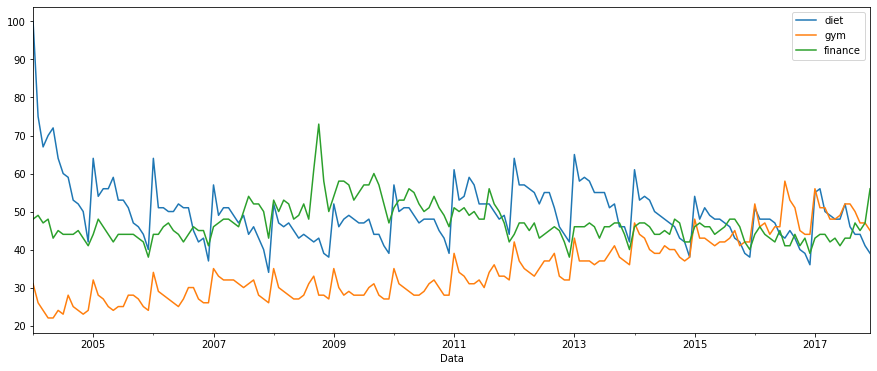

In [7]:
temporal_df.plot(figsize=(15, 6))
plt.xlabel('Data');




Plotagem dos dados referentes à dieta

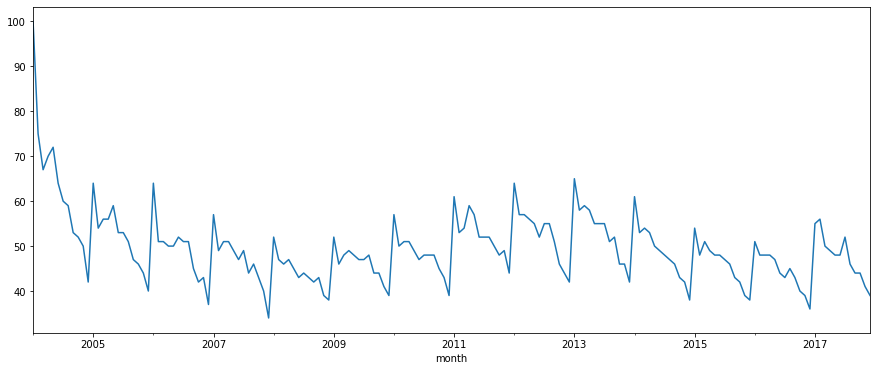

In [8]:
temporal_df.diet.plot(figsize=(15, 6));

Plotagem dos dados referentes à academia

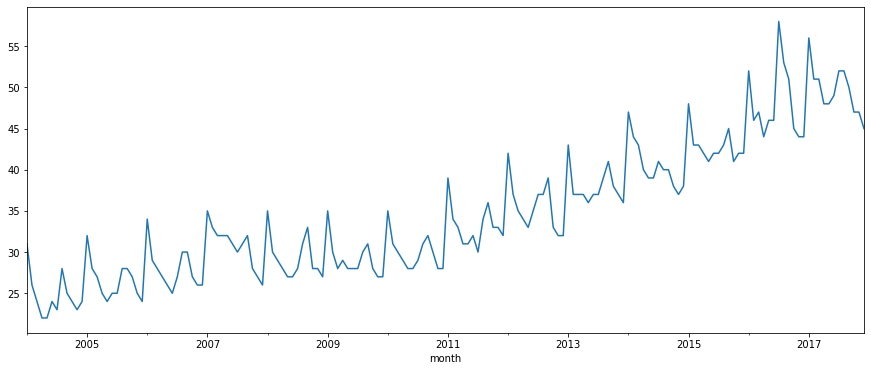

In [9]:
temporal_df.gym.plot(figsize=(15, 6));

Plotagem dos dados referentes a finanças

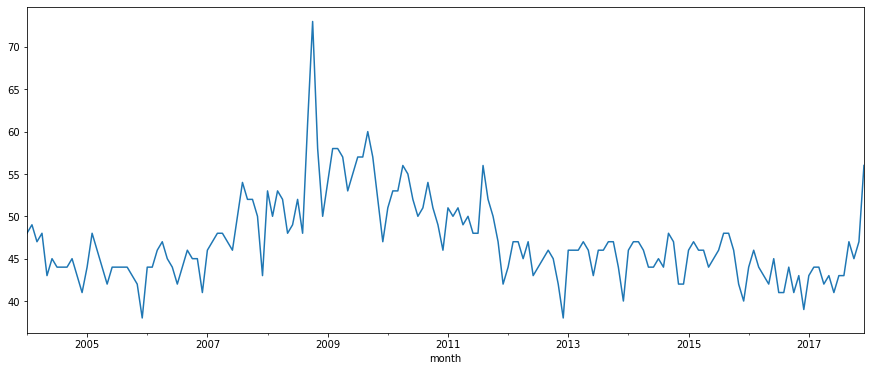

In [10]:
temporal_df.finance.plot(figsize=(15, 6));

Eliminando ruídos do gráfico de tendência dos dados de dieta utilizando médias móveis para 12 períodos.

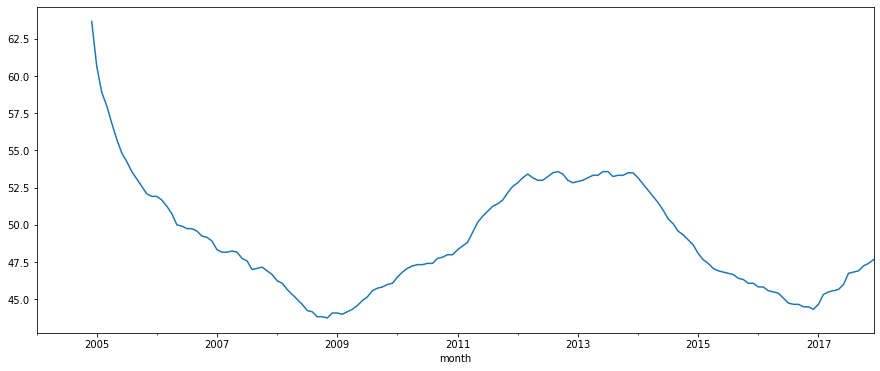

In [12]:
temporal_df.diet.rolling(12).mean().plot(figsize=(15, 6));

Eliminando ruídos do gráfico de tendência dos dados de academia utilizando médias móveis para 12 períodos.

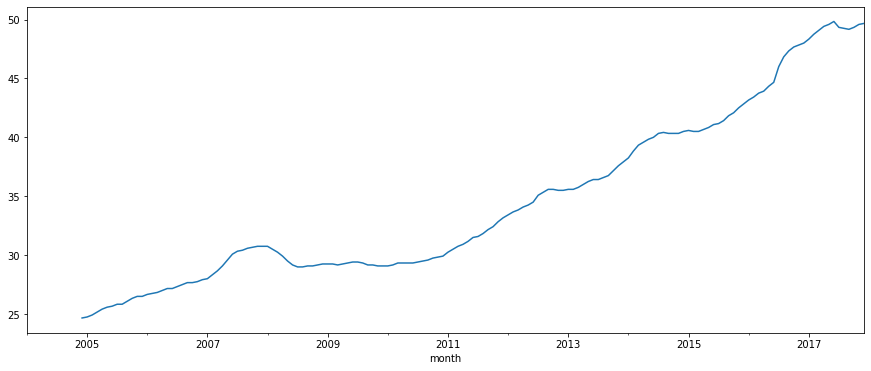

In [13]:
temporal_df.gym.rolling(12).mean().plot(figsize=(15, 6));

Eliminando ruídos do gráfico de tendência dos dados de finanças utilizando médias móveis para 12 períodos.

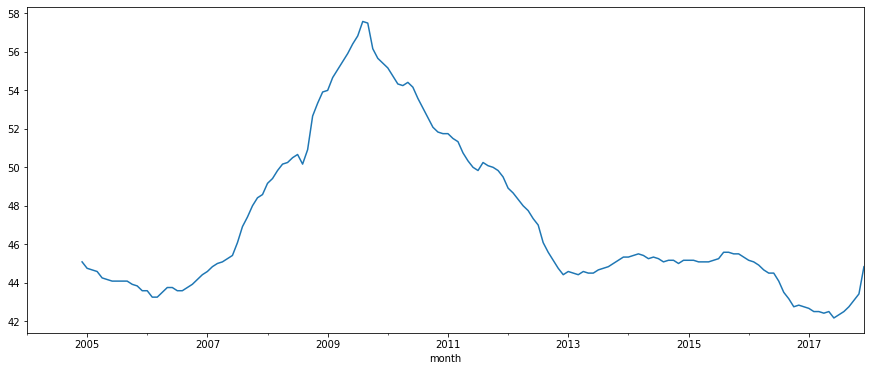

In [14]:
temporal_df.finance.rolling(12).mean().plot(figsize=(15, 6));

Utilzando o groupby para agrupar os dados de dieta por ano

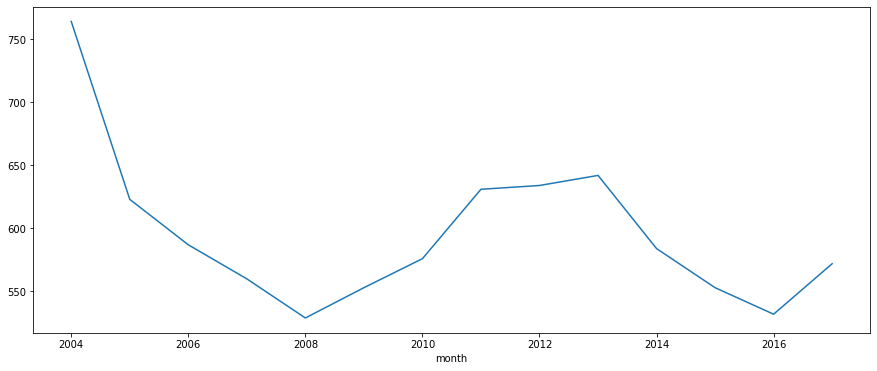

In [15]:
temporal_df.diet.groupby(temporal_df.index.year).sum().plot(figsize=(15, 6));

Utilzando o groupby para agrupar os dados de academia por ano

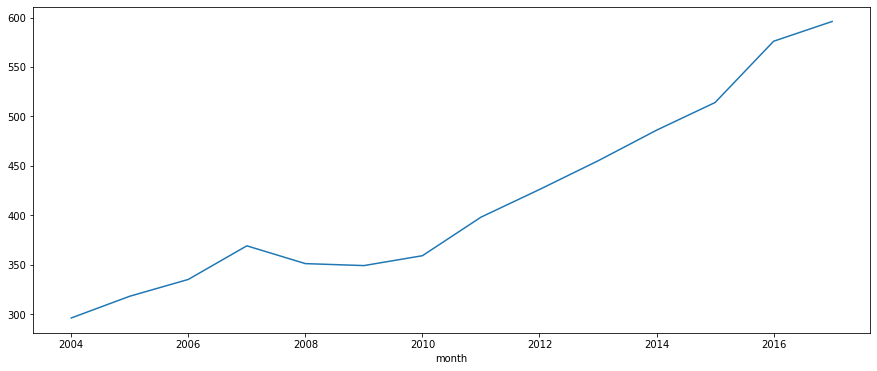

In [16]:
temporal_df.gym.groupby(temporal_df.index.year).sum().plot(figsize=(15, 6));

Utilzando o groupby para agrupar os dados de finanças por ano

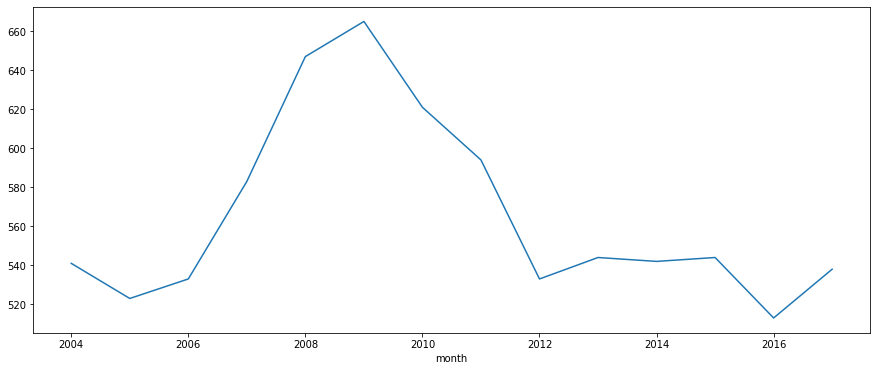

In [17]:
temporal_df.finance.groupby(temporal_df.index.year).sum().plot(figsize=(15, 6));

Analisando sazonalidade eliminando as tendências para os dados de dieta utilizando período unitário.

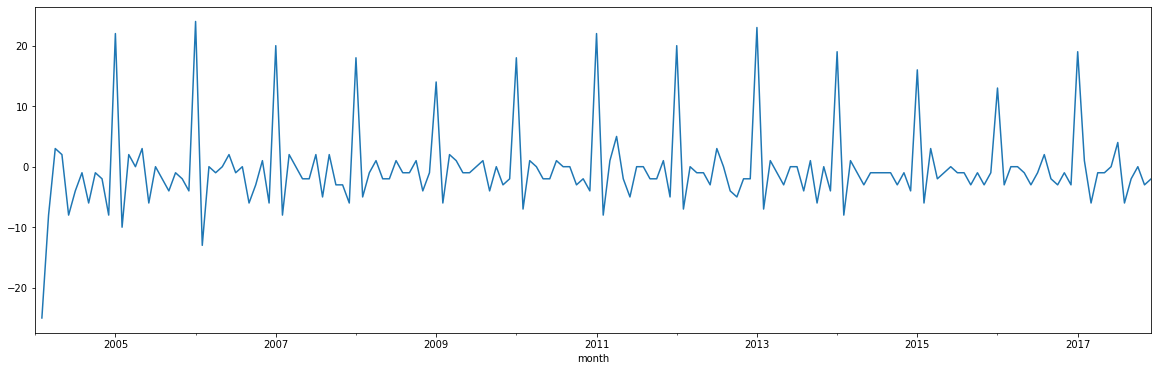

In [18]:
temporal_df.diet.diff(1).plot(figsize=(20, 6));

Analisando sazonalidade eliminando as tendências para os dados de academia utilizando período unitário.

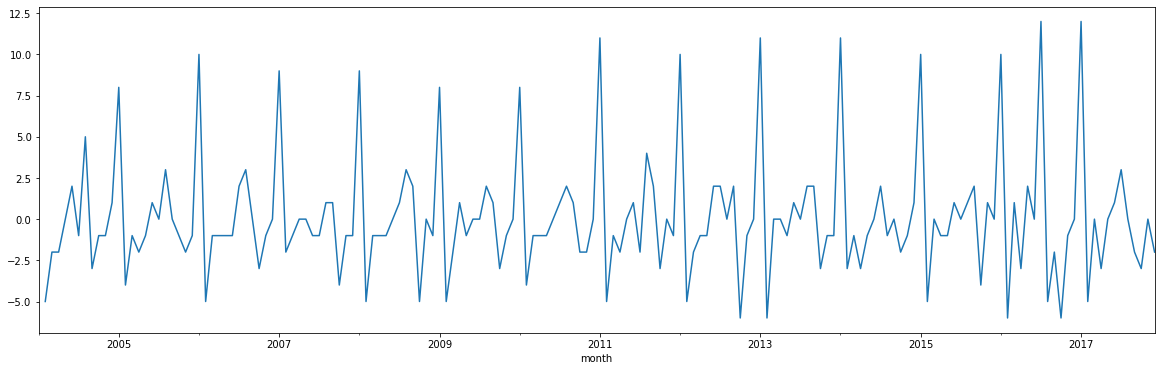

In [19]:
temporal_df.gym.diff(1).plot(figsize=(20, 6));

Analisando sazonalidade eliminando as tendências para os dados de finanças utilizando período unitário.

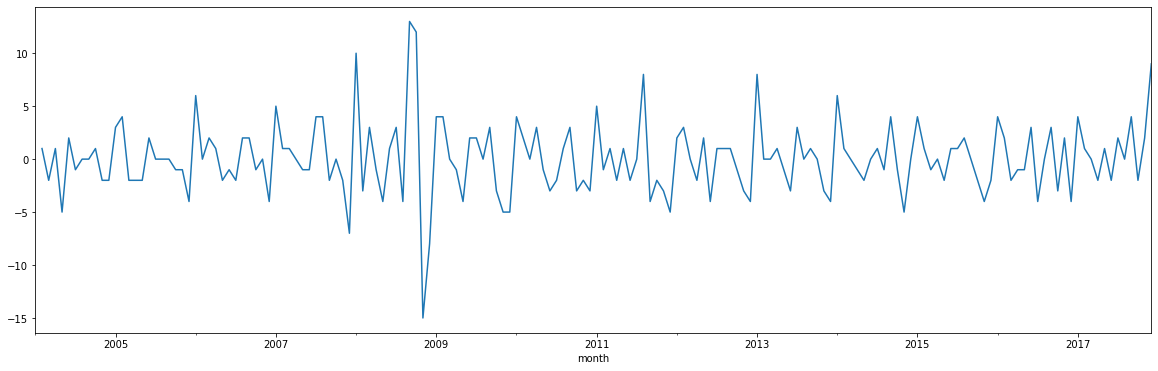

In [20]:
temporal_df.finance.diff(1).plot(figsize=(20, 6));

Analisando sazonalidade utilizando um filtro para análise de um determinado período. Observamos por exemplo que no período de 2005 a 2008 existe um pico no mês de janeiro

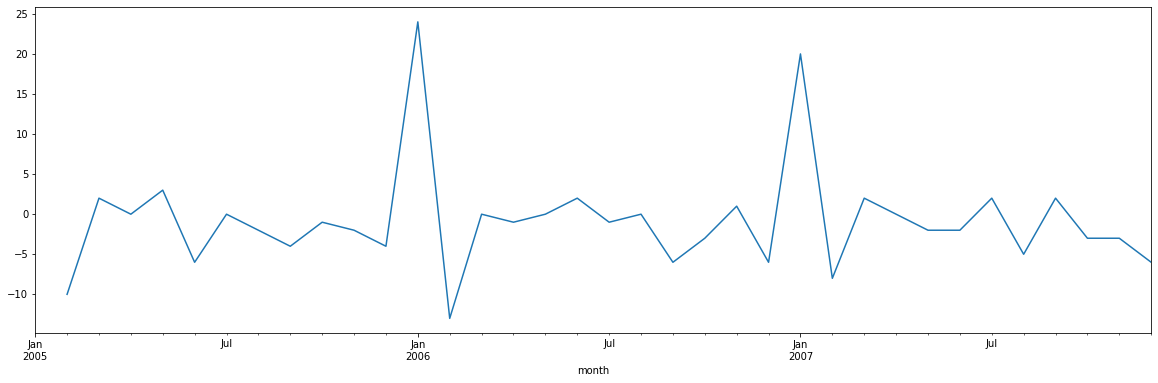

In [21]:
intervalo = (temporal_df.index.year >= 2005) & (temporal_df.index.year < 2008) 
temporal_df.diet[intervalo].diff().plot(figsize=(20, 6));

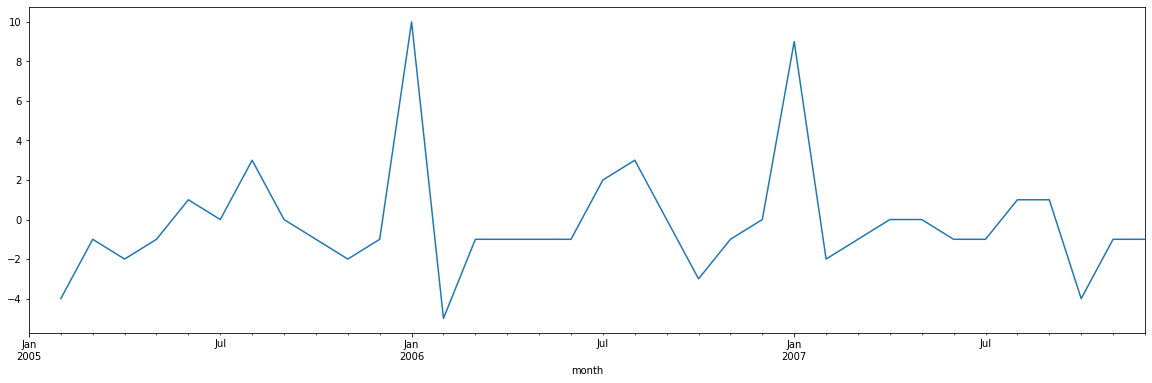

In [23]:
temporal_df.gym[intervalo].diff().plot(figsize=(20, 6));

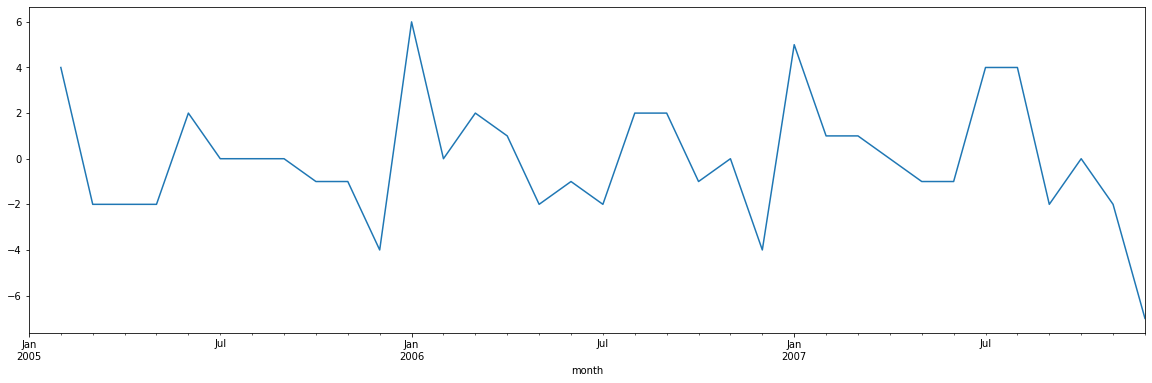

In [22]:
temporal_df.finance[intervalo].diff().plot(figsize=(20, 6));

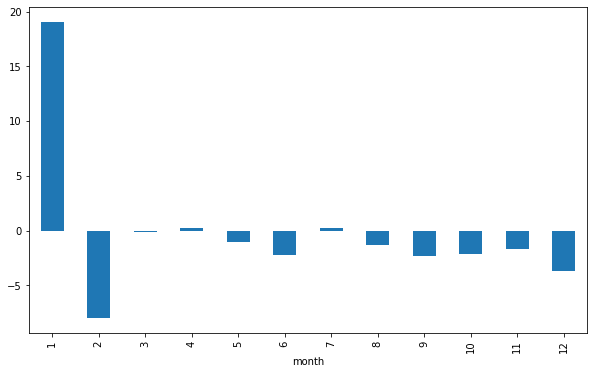

In [24]:
temporal_df.diet.diff(1).groupby(temporal_df.index.month).mean().plot(kind='bar', figsize=(10, 6));

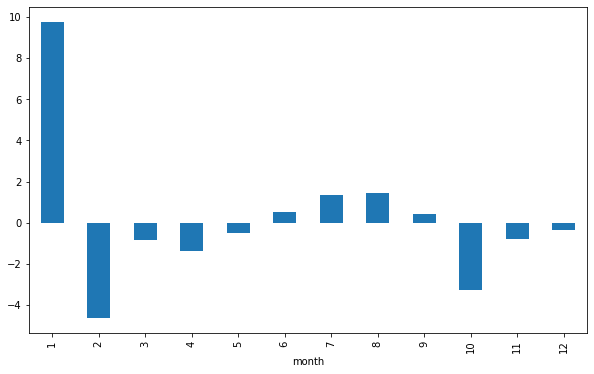

In [25]:
temporal_df.gym.diff(1).groupby(temporal_df.index.month).mean().plot(kind='bar', figsize=(10, 6));

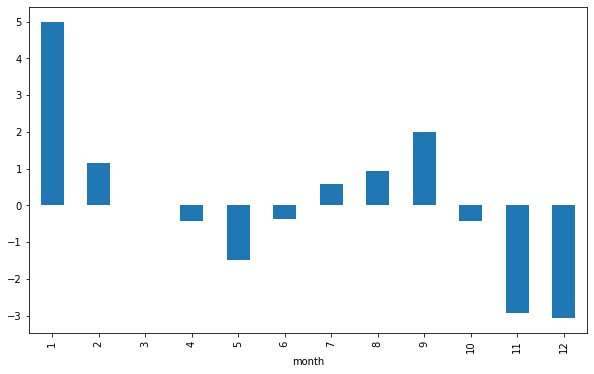

In [26]:
temporal_df.finance.diff(1).groupby(temporal_df.index.month).mean().plot(kind='bar', figsize=(10, 6));